In [1]:
library(tidyverse)
library(lme4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [7]:
Dyestuff %>% head()
Dyestuff %>% summary()

,Batch,Yield
,<fct>,<dbl>
1,A,1545
2,A,1440
3,A,1440
4,A,1520
5,A,1580
6,B,1540


 Batch     Yield     
 A:5   Min.   :1440  
 B:5   1st Qu.:1469  
 C:5   Median :1530  
 D:5   Mean   :1528  
 E:5   3rd Qu.:1575  
 F:5   Max.   :1635  

In [16]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
options(bitmapType = "cairo")
library(showtext)
font_add_google("Lato", "lato")
showtext_opts(dpi = 300)
showtext_auto()


Batch,Yield
<fct>,<dbl>
A,1505
B,1528
C,1564
D,1498
E,1600
F,1470


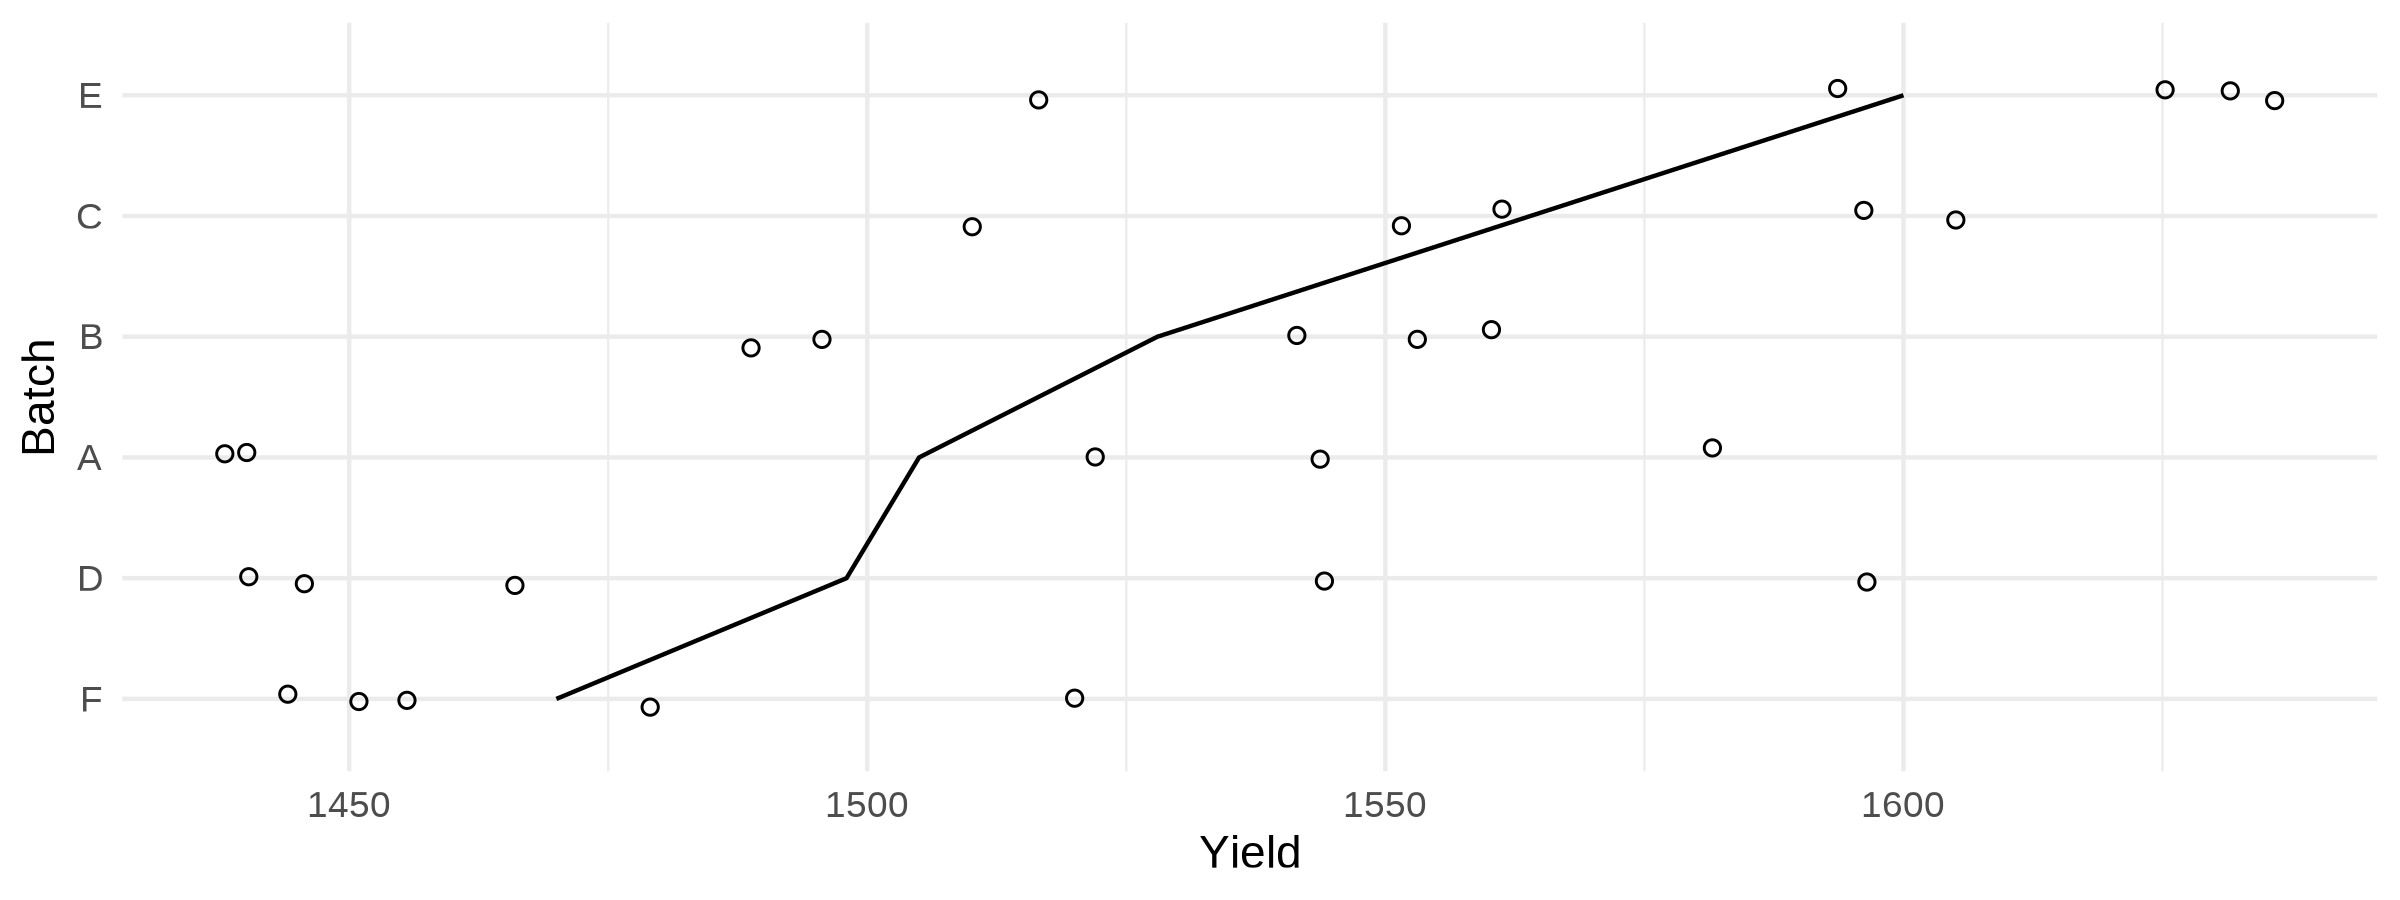

In [ ]:
mean_dyestuff <- Dyestuff %>%
    group_by(Batch) %>%
    summarise(Yield = mean(Yield), .groups = "drop")

options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
Dyestuff %>%
    mutate(Batch = fct_reorder(Batch, Yield, mean)) %>%
    ggplot(aes(x = Yield, y = Batch)) +
    geom_jitter(shape = 21, height = 0.1) +
    geom_line(data=mean_dyestuff, aes(group = 1)) +
    theme_minimal()

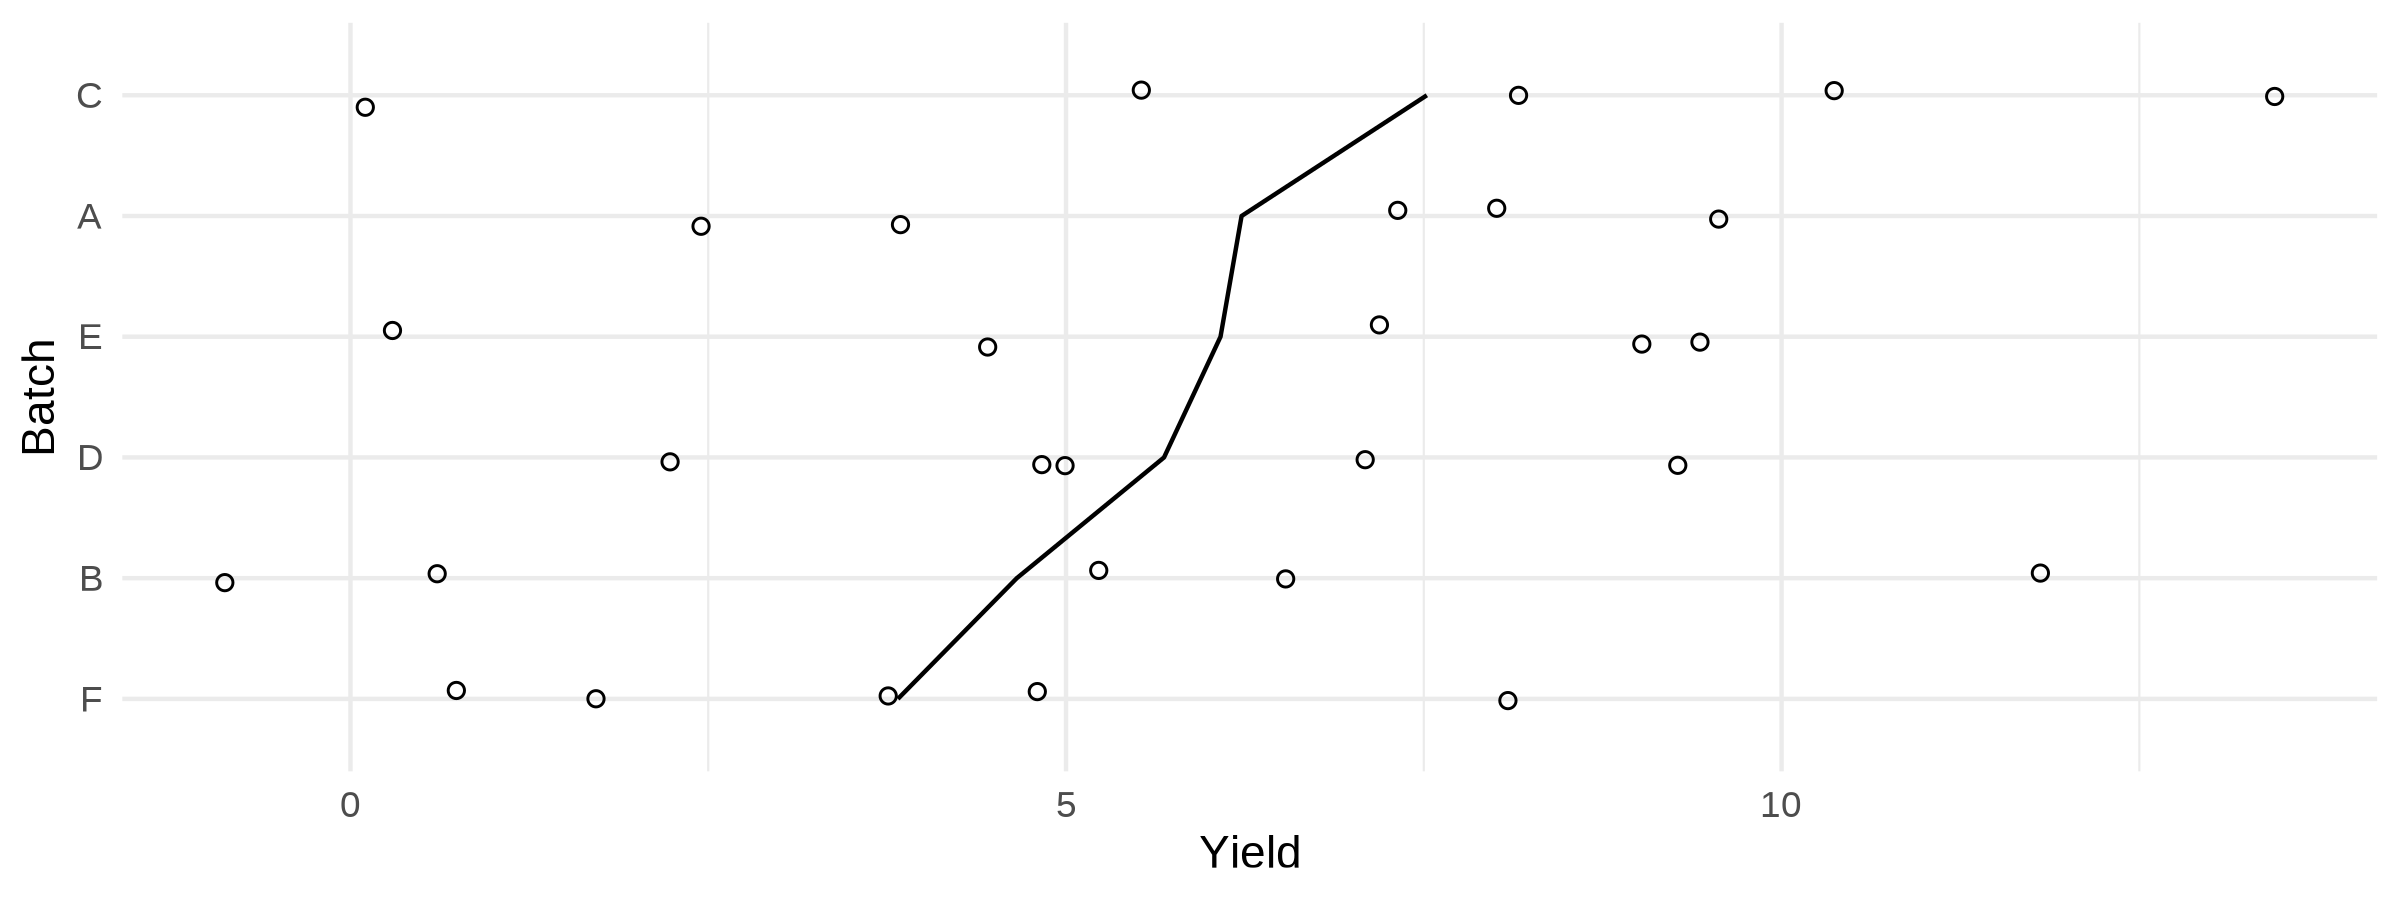

In [41]:
mean_dyestuff <- Dyestuff2 %>%
    group_by(Batch) %>%
    summarise(Yield = mean(Yield), .groups = "drop")

options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
Dyestuff2 %>%
    mutate(Batch = fct_reorder(Batch, Yield, mean)) %>%
    ggplot(aes(x = Yield, y = Batch)) +
    geom_jitter(shape = 21, height = 0.1) +
    geom_line(data=mean_dyestuff, aes(group = 1)) +
    theme_minimal()


In [47]:
fm01 <- lmer(formula = Yield ~ 1 + (1 | Batch), data = Dyestuff)
fm01 %>% summary()
fm01ML <- lmer(formula = Yield ~ 1 + (1 | Batch), data = Dyestuff, REML = FALSE)
fm01ML %>% summary()

Linear mixed model fit by REML ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff

REML criterion at convergence: 319.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4117 -0.7634  0.1418  0.7792  1.8296 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept) 1764     42.00   
 Residual             2451     49.51   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1527.50      19.38    78.8

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff

      AIC       BIC    logLik -2*log(L)  df.resid 
    333.3     337.5    -163.7     327.3        27 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4315 -0.7972  0.1480  0.7721  1.8037 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept) 1388     37.26   
 Residual             2451     49.51   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1527.50      17.69   86.33

In [50]:
fm02 <- lmer(formula = Yield ~ 1 + (1 | Batch), data = Dyestuff2)
fm02 %>% summary()

fm02ML <- update(fm02, REML = FALSE)
fm02ML %>% summary()

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff2

REML criterion at convergence: 161.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7648 -0.7806 -0.0809  0.6689  2.0907 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept)  0.00    0.000   
 Residual             13.81    3.716   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)   5.6656     0.6784   8.352
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff2

      AIC       BIC    logLik -2*log(L)  df.resid 
    168.9     173.1     -81.4     162.9        27 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.79501 -0.79398 -0.08228  0.68033  2.12645 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept)  0.00    0.000   
 Residual             13.35    3.653   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)    5.666      0.667   8.494
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')
